## Sampling with Python

In [4]:
!mamba install pandas
!mamba install statsmodels

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8275 seconds
All requested packages already installed.
mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.5689000000953675 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ patsy                         1.0.2                         py313h1804a44_0               emscripten-forge              
+ statsmodels                   0.14.6                        np22py313h3cf259a_0           emscripten-forge              


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Recall that you’re analyzing data on the literacy rate for each district.

Now imagine that you are asked to collect the data on district literacy rates, and that you have limited time to do so. You can only survey 50 randomly chosen districts, instead of the 634 districts included in your original dataset. The goal of your research study is to estimate the mean literacy rate for all 634 districts based on your sample of 50 districts.

In [6]:
education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

**Simulate random sampling**
You can use Python to simulate taking a random sample of 50 districts from your dataset. To do this, usepandas.DataFrame.sample(). The following arguments in the sample() function will help you simulate random sampling:

n: Refers to the desired sample size
replace: Indicates whether you are sampling with or without replacement
random_state: Refers to the seed of the random number
Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html.

**Note: A random seed** is a starting point for generating random numbers. You can use any arbitrary number to fix the random seed, and give the random number generator a starting point. Also, going forward, you can use the same random seed to generate the same set of numbers.

Now you’re ready to write your code. First, name a new variable sampled_data. Then, set the arguments for the sample() function:

n: You're sampling from 50 districts, so your sample size is 50.
replace: For the purpose of our example, you'll sample with replacement. True indicates sampling with replacement.
random_state: Choose an arbitrary number for your random seed. Say, 31208.

In [7]:
sample_data = education_districtwise.sample(n = 50, replace = True, random_state = 31208)
sample_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


The output shows 50 districts selected randomly from your dataset. Each has a different literacy rate, but note that row 254 was sampled twice, which is possible because you sampled with replacement.

**Compute the sample mean**
Now that you have your random sample, use the mean function to compute the sample mean. First, name a new variable estimate1. Next, use mean() to compute the mean for your sample data.

In [8]:
estimate1  = sample_data['OVERALL_LI'].mean()
estimate1 

np.float64(74.22359999999999)

The sample mean for district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts. Remember that the population mean is the literacy rate for all districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean.

Next, let’s find out what will happen if you compute the sample mean based on another random sample of 50 districts.

To generate another random sample, name a new variable estimate2. Then, set the arguments for the sample function. Once again, n is 50 and replace is "True." This time, choose a different number for your random seed to generate a different sample: 56,810. Finally, add mean() at the end of your line of code to compute the sample mean.

In [9]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

np.float64(74.2478)

For your second estimate, the sample mean for district literacy rate is about 74.25%.

Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22% – but they’re really close.

**The central limit theorem**
Recall that the central limit theorem tells you that when the sample size is large enough, the sample mean approaches a normal distribution. And, as you sample more observations from a population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be.

In this case, the population mean is the overall literacy rate for all districts in the nation. Earlier, you found that the population mean literacy rate is 73.39%. Based on sampling, your first estimated sample mean was 74.22%, and your second estimate was 74.24%. Each estimate is relatively close to the population mean.

## Compute the mean of a sampling distribution with 10,000 samples

Let’s go over the code step by step:

Create an empty list to store the sample mean from each sample. Name this estimate_list.
Set up a for-loop with the range() function. The range() function generates a sequence of numbers from 1 to 10,000. The loop will run 10,000 times, and iterate over each number in the sequence.
Specify what you want to do in each iteration of the loop. The sample() function tells the computer to take a random sample of 50 districts with replacement–the argument n equals 50, and the argument replace equals True. The append() function adds a single item to an existing list. In this case, it appends the value of the sample mean to each item in the list. Your code generates a list of 10,000 values, each of which is the sample mean from a random sample.
Create a new data frame for your list of 10,000 estimates. Name a new variable estimate_df to store your data frame.

In [14]:
estimate_list = []
for i in range(10000):
    estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data = {'estimate' : estimate_list })

Note that, because you didn't specify a random seed for each loop iteration, by default the rows sampled will be different each time.

Now, name a new variable mean_sample_means and compute the mean for your sampling distribution of 10,000 random samples.

In [15]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(73.37104586)

The mean of your sampling distribution is about 73.4%.

Compare this with the population mean of your complete dataset:

In [16]:
population_mean  = education_districtwise['OVERALL_LI'].mean()
population_mean

np.float64(73.39518927444796)

The mean of your sampling distribution is essentially identical to the population mean, which is also about 73.4%!

**Visualize your data**
To visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution, we can plot both at the same time.

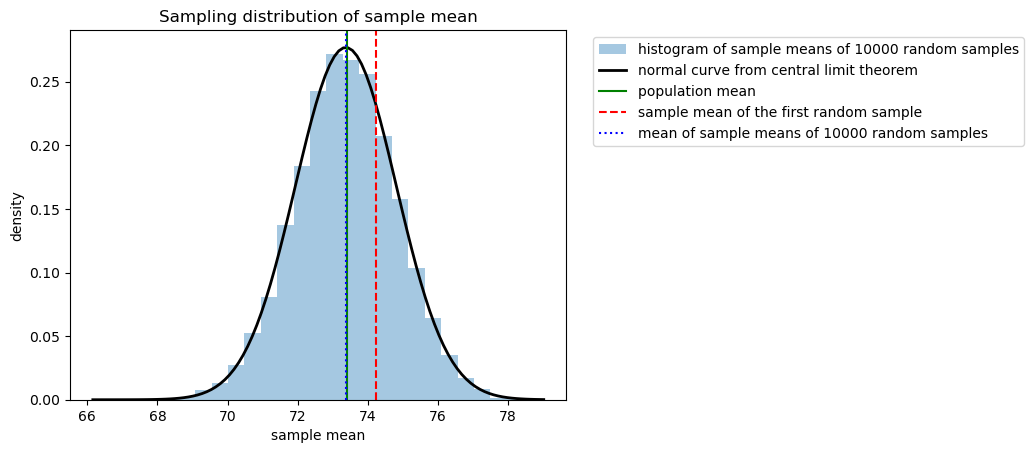

In [25]:
plt.hist(estimate_df['estimate'], bins=25,density=True,  alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

There are three key takeaways from this graph:

As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.
The sample mean of your first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability.
The central limit theorem shows that as you increase the sample size, your estimate becomes more accurate. For a large enough sample, the sample mean closely follows a normal distribution.

Your first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is relatively close to the population mean of 73.4%.

To ensure your estimate will be useful to the government, you can compare the nation’s literacy rate to other benchmarks, such as the global literacy rate, or the literacy rate of peer nations. If the nation’s literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country.

Introduction
In this activity, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work.

For this activity, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset.

In [26]:
# Load data

epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

**Generate a table of descriptive statistics**
Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [28]:
epa_data.describe(include = 'all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [29]:
# calculate the population mean
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.757692307692308)

## Statistical tests

Sample with replacement
First, name a new variable sampled_data. Then, use the sample() dataframe method to draw 50 samples from epa_data. Set replace equal to 'True' to specify sampling with replacement. For random_state, choose an arbitrary number for random seed. Make that arbitrary number 42.

In [31]:
sampled_data = epa_data.sample(n=50, replace = True, random_state= 42)
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


**Question: In the DataFrame output, why is the row index 102 repeated twice?**
We have done the sampling with replacement(replace=True) which means allowing same sample units to occur more than once. Row index 102 just happened to be sampled more than once.

In [33]:
#Compute the mean value from the aqi column
sample_mean = sampled_data['aqi'].mean()
sample_mean

np.float64(5.54)

**Question: Why is sample_mean different from population_mean?**

Due to sampling variability, the sample mean (sample_mean) is usually not the same as the population mean (population_mean). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in epa_data.

**Apply the central limit theorem**
Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the central limit theorem, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples.

In [37]:
estimate_list = []
for i in range (10000):
    estimate_list.append(epa_data['aqi'].sample(n=50,replace=True).mean())                                               

Create a new DataFrame
Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable estimate_df.

In [38]:
estimate_df = pd.DataFrame(data={'estimate':estimate_list})
estimate_df

,estimate
0,6.42
1,7.48
2,6.90
3,6.86
4,6.02
...,...
9995,8.04
9996,9.30
9997,6.42
9998,6.96


In [39]:
#Compute the mean() of the sampling distribution
mean_sample_means  = estimate_df['estimate'].mean()
mean_sample_means 

np.float64(6.754176000000001)

According to the central limit theorem, the mean of the preceding sampling distribution should be roughly equal to the population mean.

# Output the distribution using a histogram

<Axes: >

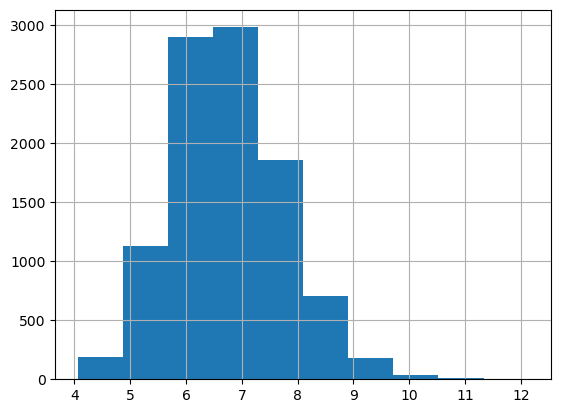

In [40]:
estimate_df['estimate'].hist()

**Calculate the standard error**
Calculate the standard error of the mean AQI using the initial sample of 50. The standard error of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [42]:
std_error1 =sampled_data['aqi'].std()/ np.sqrt(len(sampled_data))
std_error1

np.float64(0.7413225908290325)

**Visualize the relationship between the sampling and normal distributions**
Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution. The following code overlays the density curve of the normal distribution described in the theorem on top of the histogram of the sampling distribution obtained by repeated sampling. The solid magenta line in the graph is the population mean, the blue dotted line is the mean of the 10,000 sample means, and the red dashed line is the mean of the first random sample of 50.

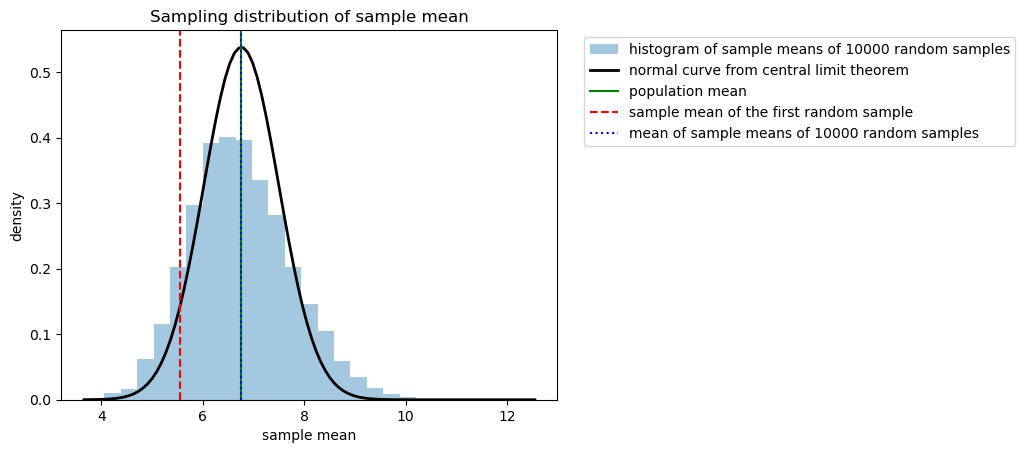

In [48]:
plt.hist(estimate_df['estimate'], bins=25,density=True,  alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x,population_mean, std_error1)
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

**Question: What insights did you gain from the preceding sampling distribution?**

The histogram of the sampling distribution is well-approximated by the normal distribution described by the central limit theorem.
The estimate based on one particular sample (red dashed line) is off-center. This is expected due to sampling variability. The red dashed line would be in a different location if epa_data.sample(n=50, replace=True, random_state=42) had a different value for random_state.
The population mean (green solid line) and the mean of the sample means (blue dotted line) overlap, meaning that they are essentially equal to each other.

**What are some key takeaways that you learned from this lab?**

Sampling with replacement on a dataset leads to duplicate rows.
Sample means are different from population means due to sampling variability.
The central limit theorem helps describe the sampling distribution of the sample mean for many different types of datasets.
**What findings would you share with others?**

The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

# Confidence intervals

In [49]:
education_districtwise = pd.read_csv("education_districtwise.csv")
education_districtwise = education_districtwise.dropna()

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Earlier, we imagined that the Department of Education asked you to collect the data on district literacy rates. You were only able to survey 50 randomly chosen districts, instead of all 634 districts included in your original dataset. You used Python to simulate taking a random sample of 50 districts, and make a point estimate of the population mean, or literacy rate for all districts.

Now imagine that the department asks you to construct a 95% confidence interval for your estimate of the mean district literacy rate. You can use Python to construct the confidence interval.

You can also use the same sample data that you worked with earlier. Write the code to have Python simulate the same random sample of district literacy rate data. First, name your variable sampled_data. Then, enter the arguments of the sample() function.

In [50]:
sampled_data = education_districtwise.sample(n=50, replace = True, random_state = 31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


**Construct a 95% confidence interval**
Now, construct a 95% confidence interval of the mean district literacy rate based on your sample data. Recall the four steps for constructing a confidence interval:

Identify a sample statistic
Choose a confidence level
Find the margin of error
Calculate the interval

scipy.stats.norm.interval()
Earlier, you worked through these steps one by one to construct a confidence interval. With Python, you can construct a confidence interval with just a single line of code–and get your results faster!

If you’re working with a large sample size, say larger than 30, you can construct a confidence interval for the mean using scipy.stats.norm.interval(). This function includes the following arguments:

confidence: The confidence level
loc: The sample mean
scale: The sample standard error

In [51]:
#calculate the sample mean
sample_mean = sampled_data['OVERALL_LI'].mean()

In [52]:
#calculate the std error

estimated_std_error = sampled_data['OVERALL_LI'].std()/np.sqrt(len(sampled_data))
estimated_std_error

np.float64(1.4292043386558317)

confidence: Enter 0.95 because you want to use a 95% confidence level
loc: Enter the variable sample_mean
scale: Enter the variable estimated_std_error

In [57]:
from scipy import stats

In [61]:
#calculate the 95% confidence interval
stats.norm.interval(confidence = 0.95, loc = sample_mean, scale =  estimated_std_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

You have a 95% confidence interval for the mean district literacy rate that stretches from about 71.4% to 77.0%.

95% CI: (71.42, 77.02)

The Department of Education will use your estimate of the mean district literacy rate to help make decisions about distributing funds to different states.

**Construct a 99% confidence interval**
Now imagine that a senior director in the department wants to be even more confident about your results. The director wants to make sure you have a reliable estimate, and suggests that you recalculate your interval with a 99% confidence level.

In [62]:
#calculate the 99% confidence interval
stats.norm.interval(confidence = 0.99, loc = sample_mean, scale =  estimated_std_error)

(np.float64(70.54221358373107), np.float64(77.90498641626891))

Relationship between confidence level and confidence interval
You may notice that as the confidence level gets higher, the confidence interval gets wider.

With a confidence level of 95%, the interval covers 5.6 percentage points (71.4% - 77.0%)
With a confidence level of 99%, the interval covers 7.4 percentage points (70.5% - 77.9%)
This is because a wider confidence interval is more likely to include the actual population parameter.

# Explore confidence intervals

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:

Provide a summary of the mean AQI for the states in which RRE operates.
Construct a boxplot visualization for AQI of these states using seaborn.
Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
Construct a confidence interval for the RRE state with the highest mean AQI.

In [63]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [64]:
#Explore your dataset
aqi.describe(include='all')


,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [65]:
aqi['state_name'].value_counts()

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Pennsylvania            10
Texas                   10
New York                10
Colorado                 9
Michigan                 9
Minnesota                7
New Jersey               6
Indiana                  5
Connecticut              4
Nevada                   4
Virginia                 4
Maryland                 4
Massachusetts            4
North Carolina           4
Oklahoma                 4
Wyoming                  3
Iowa                     3
Hawaii                   3
Missouri                 3
Illinois                 3
Vermont                  3
Kentucky                 3
Utah                     3
Rhode Island             2
Maine                    2
Idaho                    2
Tennessee                2
Georgia                  2
Nebraska                 2
Washington               2
Montana                  2
New Hampshire            2
New Mexico       

**Question: What time range does this data cover?**
All of the sites collected data on January 1st, 2018.

**Question: What are the minimum and maximum AQI values observed in the dataset?**
The minimum AQI value is 0 and the maximum AQI value is 50.

**Question: Are all states equally represented in the dataset?**
Not all states eqaully represented. California has 66 sites and Delaware and Alabama have only one site

# Summarize the mean AQI for RRE states

In [67]:
# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({'aqi':'mean','state_name':'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


In [72]:
!mamba install seaborn
import seaborn as sns

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.2195 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ seaborn                       0.13.2                        hd8ed1ab_3                    conda-forge                   
+ seaborn-base                  0.13.2                        pyhd8ed1ab_3                  conda-forge                   


<Axes: xlabel='state_name', ylabel='aqi'>

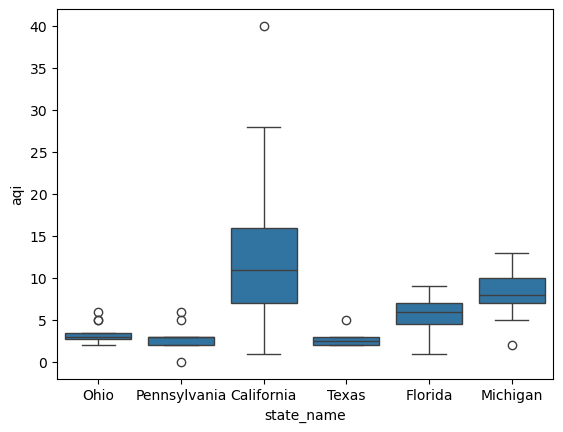

In [74]:
#Construct a boxplot visualization for the AQI of these states
sns.boxplot(x=aqi_rre['state_name'],
            y=aqi_rre['aqi'])

**Question: Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?**

California: The mean and a signficant portion of the boxplot range over 10.
Michigan: While the mean is below 10, the boxplot ranges above 10.

**Construct a confidence interval for the RRE state with the highest mean AQI**

In [75]:
# Find the mean aqi for your state.
aqi_ca = aqi[aqi['state_name'] == 'California']

aqi_ca_mean = aqi_ca['aqi'].mean()
aqi_ca_mean

np.float64(12.121212121212121)

In [81]:
#Choose your confidence level
confidence_level = 0.95

Find your margin of error (ME)
Recall margin of error = z * standard error
Confidence Level	Z Score
90%	1.65
95%	1.96
99%	2.58

In [76]:
z_value = 1.96
# Next, calculate your standard error.

std_error = aqi_ca['aqi'].std() / np.sqrt(len(aqi_ca))
std_error

np.float64(0.8987209641127412)

In [77]:
# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = std_error * z_value
margin_of_error

np.float64(1.7614930896609726)

In [78]:
#Calculate both a lower and upper limit surrounding your sample mean to create your interval.

upper_ci_limit = aqi_ca_mean + margin_of_error
lower_ci_limit = aqi_ca_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(np.float64(10.359719031551148), np.float64(13.882705210873095))

Alternative: Construct the interval using scipy.stats.norm.interval()

In [82]:
stats.norm.interval(confidence = confidence_level, loc=aqi_ca_mean, scale= std_error)

(np.float64(10.359751399400034), np.float64(13.882672843024208))

**What are key takeaways from this lab?**

Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change.
Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.
**What findings would you share with others?**

Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval.
Convey that a confidence interval at the 95% level of confidence from this sample data yielded [10.36 , 13.88], which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become [9.80 , 14.43].
**What would you convey to external stakeholders?**

Explain statistical significance at a high level.
Describe California's observed mean AQI and suggest focusing on that state.
Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
Convey any potential shortcomings of this analysis, such as the short time period being referenced.